**Hand Writing Recognition(CNN)**

In [44]:
import tensorflow as tf
from tensorflow.keras import layers,models
tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt

In [45]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

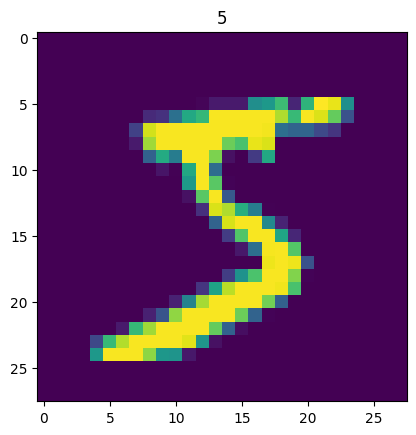

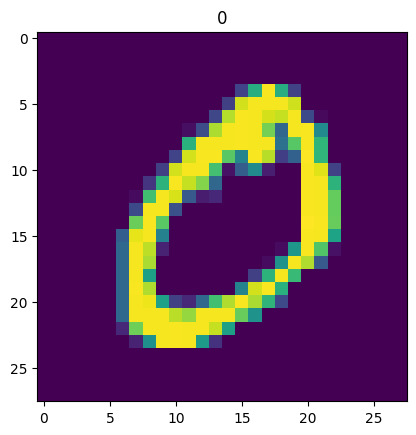

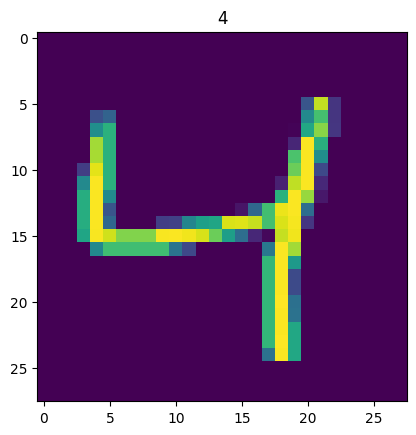

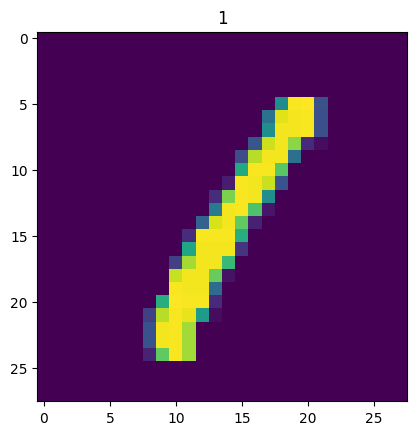

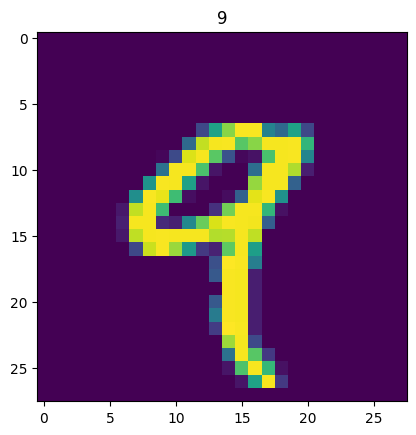

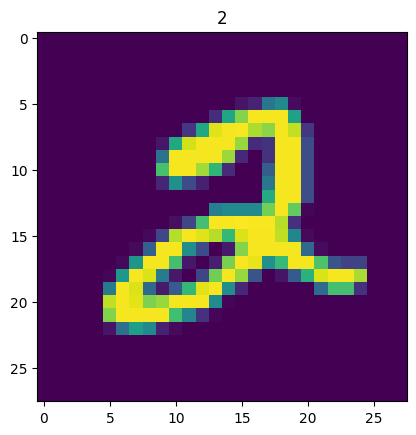

In [46]:
for i in range(6):
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.show()

In [57]:
#normalizing
x_train=x_train/255
x_test=x_test/255

In [48]:
#reshapping
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [49]:
#onehot encode
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [50]:
#model building
model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),         #8layers,3 conv,2 max,1 flatten,2 dense
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8933 - loss: 0.3430 - val_accuracy: 0.9867 - val_loss: 0.0442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9882 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9895 - loss: 0.0313 - val_accuracy: 0.9887 - val_loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9919 - val_loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9909 - val_loss: 0.0262


In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('test_loss:',test_loss,
      'test-accuracy:',test_acc)

313/313 - 4s - 13ms/step - accuracy: 0.1135 - loss: 2.3306
test_loss: 2.3306469917297363 test-accuracy: 0.11349999904632568


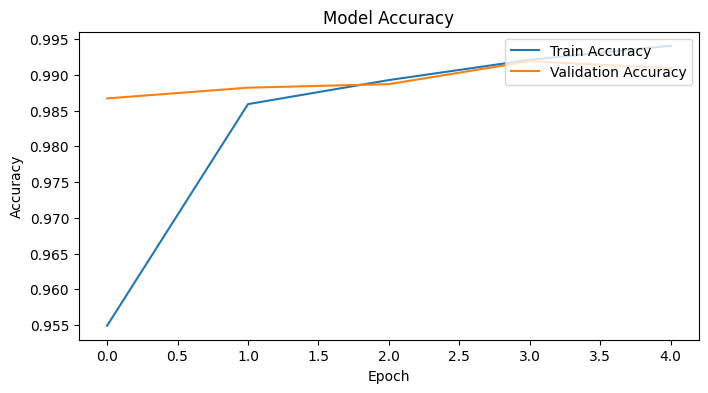

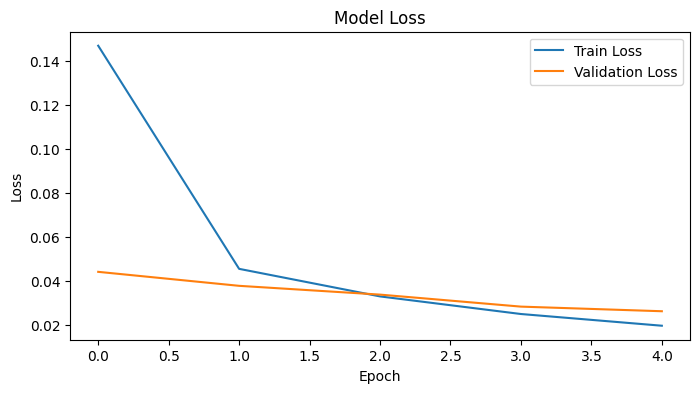

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [55]:
model.save('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


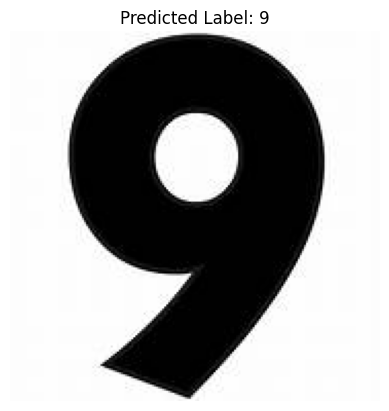

In [56]:
import numpy as np
from PIL import Image

model = tf.keras.models.load_model('my_model.h5')


def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array


image_path = '/content/nine.jpeg'
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction, axis=1)


img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label[0]}")
plt.axis('off')
plt.show()